<a href="https://colab.research.google.com/github/Praxis-QR/DeepLearning/blob/main/AI_DL_Chapter_5_CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://1.bp.blogspot.com/-WAjYIaQofo0/YEB0cQsSGSI/AAAAAAAAkoE/TpQcWBRGtu0N010lmiTS9cFHuGwXB45PQCLcBGAsYHQ/s16000/colabHeader00.png)<br>

<hr>

[Prithwis Mukerjee](http://www.yantrajaal.com) / [Praxis Business School](http://praxis.ac.in/) / [Book Website](http://aidl4managers.blogspot.com) 

##Build your first Convolutional Neural Network to recognize images <br>
please read through this document to follow the code in this notebook <br>
https://medium.com/intuitive-deep-learning/build-your-first-convolutional-neural-network-to-recognize-images-84b9c78fe0ce

YOU MAY WANT TO USE A GPU TO EXPEDITE PROCESSING

#Data Preprocessing

In [1]:
#cifar10 dataset - more details at https://www.cs.toronto.edu/~kriz/cifar.html
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [2]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
#print(x_train[0])

In [3]:
print(y_train[0])

[6]


The label is: [2]


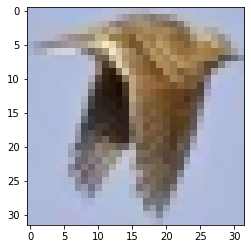

In [4]:
import matplotlib.pyplot as plt
# see what a random picture really looks like
print('The label is:', y_train[123])
img = plt.imshow(x_train[123])

The label is: [5]


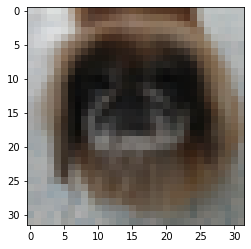

In [5]:
# see another random picture
print('The label is:', y_train[999])
img = plt.imshow(x_train[999])

In [6]:
#import keras - code modified by PM on 20 Jul 21
# see https://datascience.stackexchange.com/questions/76227/attributeerror-module-tensorflow-python-keras-utils-has-no-attribute-to-cate

from tensorflow import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [7]:
print('OneHot label for:',y_train[123], 'is', y_train_one_hot[123])
print('OneHot label for:',y_train[999], 'is', y_train_one_hot[999])

OneHot label for: [2] is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
OneHot label for: [5] is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

#Build & Train CNN

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
from time import time
# with a GPU, this will take about 6 secs per epoch
# this step takes a long time, anything from 200 - 500 seconds
t0 = time()
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)
time_taken = time() - t0
print("Time taken to train model is ", time_taken )

Epoch 1/20
1250/1250 [==============================] - 49s 15ms/step - loss: 1.6006 - accuracy: 0.4142 - val_loss: 1.1875 - val_accuracy: 0.5670
Epoch 2/20
1250/1250 [==============================] - 17s 14ms/step - loss: 1.1669 - accuracy: 0.5825 - val_loss: 0.9991 - val_accuracy: 0.6465
Epoch 3/20
1250/1250 [==============================] - 18s 14ms/step - loss: 0.9985 - accuracy: 0.6472 - val_loss: 0.8780 - val_accuracy: 0.6950
Epoch 4/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.8975 - accuracy: 0.6803 - val_loss: 0.8125 - val_accuracy: 0.7167
Epoch 5/20
1250/1250 [==============================] - 18s 15ms/step - loss: 0.8220 - accuracy: 0.7079 - val_loss: 0.7756 - val_accuracy: 0.7250
Epoch 6/20
1250/1250 [==============================] - 17s 13ms/step - loss: 0.7639 - accuracy: 0.7308 - val_loss: 0.7969 - val_accuracy: 0.7189
Epoch 7/20
1250/1250 [==============================] - 17s 14ms/step - loss: 0.7134 - accuracy: 0.7484 - val_loss: 0.7065 -

In [13]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#Visualise and Evaluate

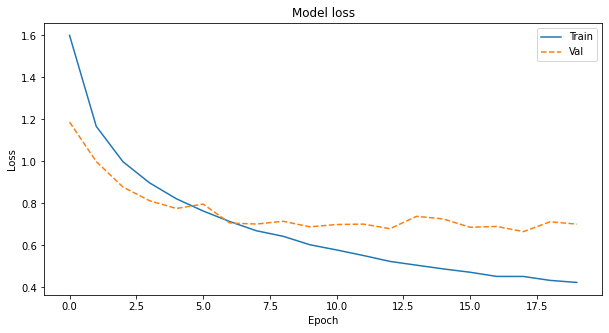

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(hist.history['loss'],linestyle='solid')
plt.plot(hist.history['val_loss'],linestyle='dashed')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

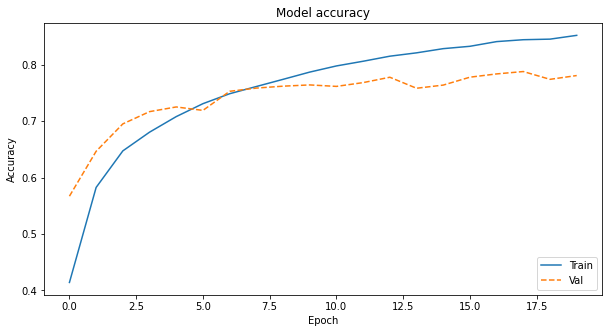

In [15]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(hist.history['accuracy'],linestyle='solid')
plt.plot(hist.history['val_accuracy'],linestyle='dashed')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
#model.evaluate(x_test, y_test_one_hot)[1]
model.evaluate(x_test, y_test_one_hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.7616 - accuracy: 0.7536


[0.7615578770637512, 0.753600001335144]

#Save and Reload Model

In [16]:
from keras.models import model_from_json
from keras.models import load_model

In [17]:
# serialize model to JSON
model_json = model.to_json()
with open("AIDLCNNDemo.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("AIDLCNNDemo.h5")
print("Saved model to disk")

Saved model to disk


In [18]:
#Download Prebuilt Models from author's GDrive / Github
#
#Uncomment the next two lines by removing the # from the first position
#
#!gdown https://drive.google.com/uc?id=15_vbIyWFavTvzCyWqO1KwxvJhNuK2TnF
#!gdown https://drive.google.com/uc?id=1GLkReI8G9GPmmGelyu77H5_WEDXf-Q6-
#!wget -O AIDLCNNDemo.h5 https://github.com/Praxis-QR/DeepLearning/blob/main/models/AIDLCNNDemo.h5?raw=true
#!wget https://raw.githubusercontent.com/Praxis-QR/DeepLearning/main/models/AIDLCNNDemo.json

--2021-10-25 03:07:10--  https://github.com/Praxis-QR/DeepLearning/blob/main/models/AIDLCNNDemo.h5?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Praxis-QR/DeepLearning/raw/main/models/AIDLCNNDemo.h5 [following]
--2021-10-25 03:07:10--  https://github.com/Praxis-QR/DeepLearning/raw/main/models/AIDLCNNDemo.h5
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Praxis-QR/DeepLearning/main/models/AIDLCNNDemo.h5 [following]
--2021-10-25 03:07:10--  https://raw.githubusercontent.com/Praxis-QR/DeepLearning/main/models/AIDLCNNDemo.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [19]:
# load json and create model
json_file = open('AIDLCNNDemo.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("AIDLCNNDemo.h5")
print("Loaded model from disk")

Loaded model from disk


In [20]:
loaded_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
loaded_model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 2s 6ms/step - loss: 0.7205 - accuracy: 0.7694


0.7694000005722046

#Prediction

In [22]:
import numpy as np

In [23]:
print('The one hot label is:', y_train_one_hot[123])
print('The one hot label is:', y_train_one_hot[999])

The one hot label is: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The one hot label is: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
k1 = x_train[123]
q = loaded_model.predict(np.array([k1,]))
print(np.round_(q))
# only the 3rd element is non Zero, predicted labes is 6

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [25]:
k1 = x_train[999]
q = model.predict(np.array([k1,]))
print(np.round_(q))

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [26]:
K = x_train[0:2,]
P = model.predict(K)
np.round_(P)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

#Chronobooks <br>
![alt text](https://1.bp.blogspot.com/-lTiYBkU2qbU/X1er__fvnkI/AAAAAAAAjtE/GhDR3OEGJr4NG43fZPodrQD5kbxtnKebgCLcBGAsYHQ/s600/Footer2020-600x200.png)<hr>
Chronotantra and Chronoyantra are two science fiction novels that explore the collapse of human civilisation on Earth and then its rebirth and reincarnation both on Earth as well as on the distant worlds of Mars, Titan and Enceladus. But is it the human civilisation that is being reborn? Or is it some other sentience that is revealing itself. 
If you have an interest in AI and found this material useful, you may consider buying these novels, in paperback or kindle, from [http://bit.ly/chronobooks](http://bit.ly/chronobooks)

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png) The contents of this website are released under creative commons 